In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV,Ridge
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [91]:
df = pd.read_csv("/Users/saikatbasu/Documents/PersonalInformation_Oct2022/IBMDataScience-Coursera/MLwithPython-9of12/Module5-EvaluatingValidatingModels/heart-2.csv")

In [92]:
y = df['target']
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
y.shape

(1025,)

In [93]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=42)

In [107]:
knn = KNeighborsClassifier(n_neighbors=10)
svc = SVC(kernel='rbf',C=3)
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=8)

In [108]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [109]:
svc.fit(X_train,y_train)

SVC(C=3)

In [110]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [112]:
yhat_knn = knn.predict(X_test)
yhat_svc = svc.predict(X_test)
yhat_dtree = dtree.predict(X_test)

In [113]:
accuracy_score(y_test,yhat_knn)

0.8521400778210116

In [114]:
accuracy_score(y_test,yhat_svc)

0.9299610894941635

In [115]:
accuracy_score(y_test,yhat_dtree)

0.9416342412451362

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_68948/2150354319.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='b',label="Actual targets")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_68948/2150354319.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

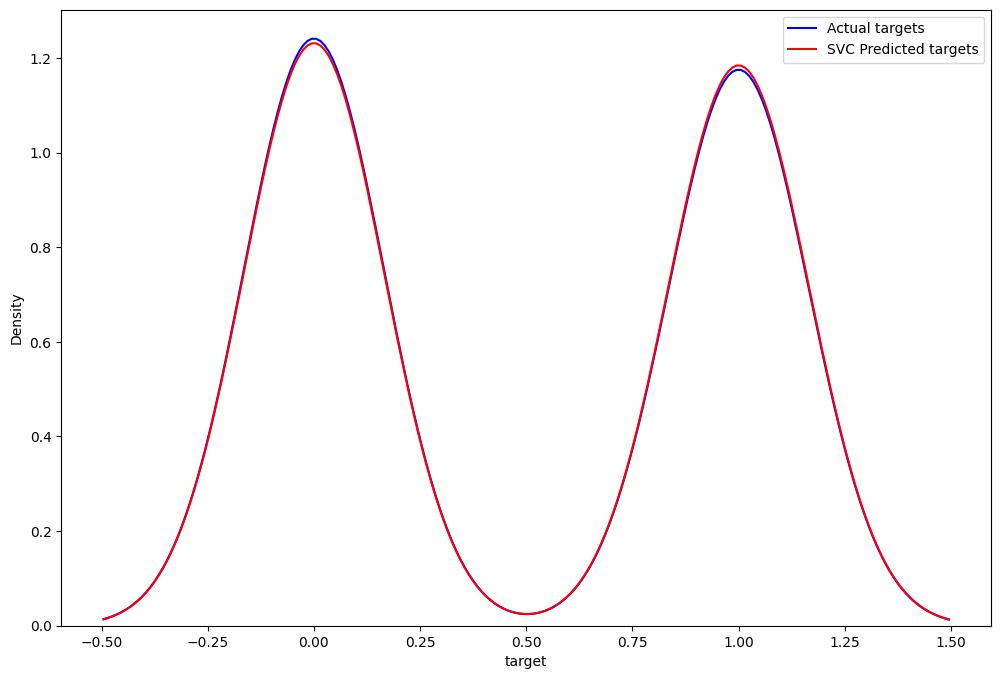

In [116]:
plt.figure(figsize=[12,8])
ax1 = sns.distplot(y_test,hist=False,color='b',label="Actual targets")
sns.distplot(yhat_dtree,hist=False,color='r',label="SVC Predicted targets",ax=ax1)
plt.legend()

In [117]:
accuracy_score(y_test,yhat_knn)

0.8521400778210116

In [118]:
accuracy_score(y_test,yhat_svc)

0.9299610894941635

In [119]:
print(confusion_matrix_knn)

[[114  18]
 [ 20 105]]


In [120]:
print(confusion_matrix_svc)

[[120  12]
 [  6 119]]


In [121]:
confusion_matrix_knn = confusion_matrix(y_test,yhat_knn)
confusion_matrix_svc = confusion_matrix(y_test,yhat_svc)
confusion_matrix_dtree = confusion_matrix(y_test,yhat_dtree)

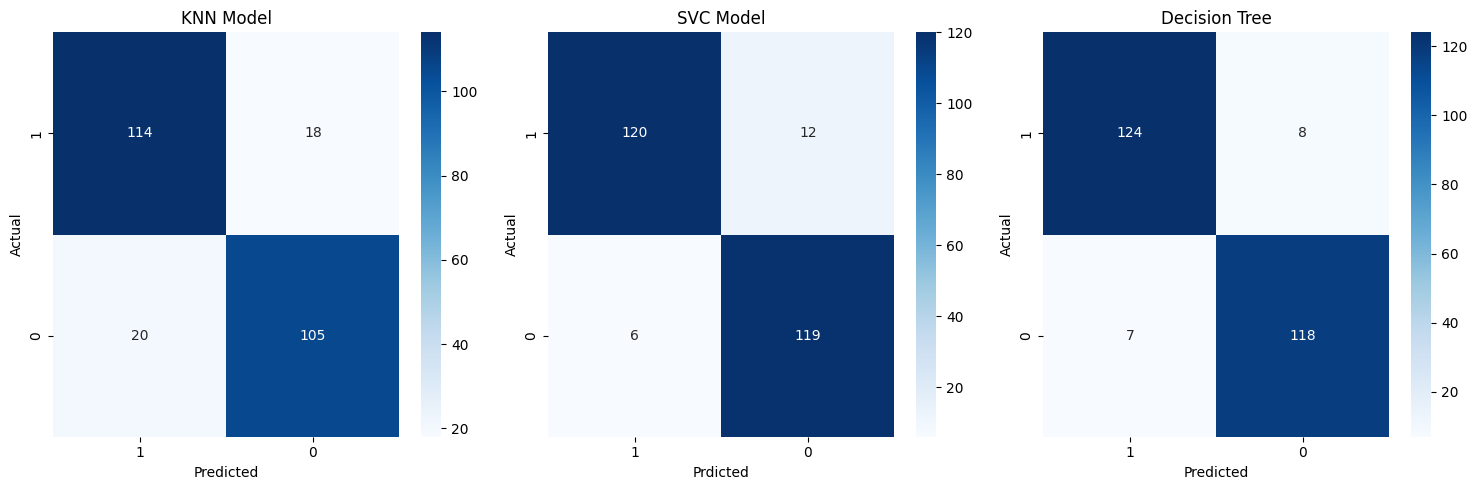

In [123]:
labels = [1,0]
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.heatmap(confusion_matrix_knn,annot=True,cmap='Blues',ax=axes[0],fmt='d',xticklabels=labels,yticklabels=labels)
axes[0].set_title("KNN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
sns.heatmap(confusion_matrix_svc,annot=True,cmap='Blues',ax=axes[1],fmt='d', xticklabels=labels,yticklabels=labels)
axes[1].set_title("SVC Model")
axes[1].set_xlabel("Prdicted")
axes[1].set_ylabel("Actual")
sns.heatmap(confusion_matrix_dtree,annot=True,cmap='Blues',ax=axes[2],fmt='d',xticklabels=labels,yticklabels=labels)
axes[2].set_title("Decision Tree")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")
plt.tight_layout()
plt.show()

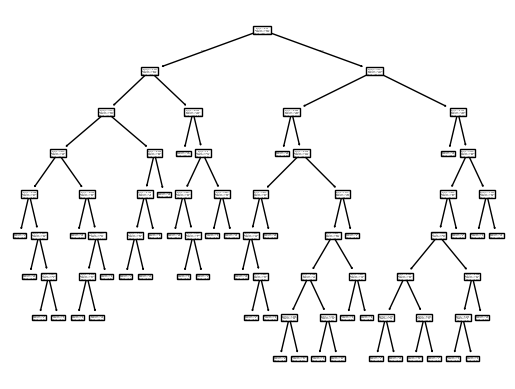

In [125]:
plot_tree(dtree)
plt.show()